<a href="https://colab.research.google.com/github/RahulJuluru2/unit2assignments/blob/main/U2W9_10_Isomap_A_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



## Learning Objective

At the end of the experiment, you will be able to:
            
*   Visualize the high-dimensional data (3D) to low-dimensional data (2D) by applying the Isomap algorithm 
*    Understand how the introduction of noise into data affects the lower-dimensional (2D) representation of data




In [ ]:
#@title Experiment Walkthrough Video
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.exec.talentsprint.com/non-processed/module_2_week_9_demo_lab_1_new.mp4" type="video/mp4">
</video>
""")

## Dataset 

### Description

The dataset chosen for this experiment is a swissroll.

## Domain Information

Swiss Roll is a curled surface, where the distance between the points along the surface of the roll and direct distance is different.

If we just projected a 2D plane onto a 3D space it would simply squash the various layers together and lose all the information like geometry and similarity between points. we wanted to capture. Instead, what we want is to unroll the Swiss roll, to obtain a 2D data set,  without much loss of information. This approach is Manifold Learning.


Manifold Learning is when we bend and twist a high-dimensional space such that it can be mapped to a lower-dimensional space. It ensures that the optimal manifold is found by reducing the dimensionality of our data set.



## AIML Technique

In this experiment, swiss roll data is a high-dimensional dataset which is difficult to visualize. To aid visualization of the structure of the dataset, the dimension must be reduced in some way. One of the approaches to manifold learning, Isomap performs dimensionality reduction by seeking lower dimensional embedding in data. Isomap maintains the geodesic distances between the points. This problem is unsupervised: it learns the non-linear structure in the data from the swiss roll data itself. 

## Setup Steps

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2216842" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9959488784" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W9_10_Isomap_A" #name of the notebook

def setup(): 
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


## Import the required packages


In [ ]:
from sklearn.datasets import *
# Manifold is imported to access swiss roll dataset and the dimensionality reduction approach: Isomap
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Generate the swiss roll data

Note: Refer to [make_swiss_roll](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_swiss_roll.html) from sklearn package

In [ ]:
# Specify the number of data samples from swiss roll
n_samples = 1500
''''we use make_swiss_roll method which takes the number of data samples and 
returns the 3D coordinates of those data samples with the colors projected onto each sample
input is 1500 samples and output will be 1500 X 3'''

X, color = make_swiss_roll(n_samples)

In [ ]:
# Print the shape of 'X' and 'color'
X.shape, color.shape

((1500, 3), (1500,))

As you can see above, each of the points in 'X' is labeled with a color label in 'color' variable. 

**Note:** Here we are not using the label for classification purpose, but only for plotting swiss roll with different points which represents different set of colors



## ISOMAP

By using ISOMAP reduce the dimensions of data from higher to lower

Consider swiss roll data how to find or preserve the geodesic distance between each data point along the manifold

First connect every data point in the swiss roll with the K-nearest neighbors


### Varying the parameter of the number of neighbors

The **n_neighbors** in the Isomap, is the number of neighbors a given point must consider, so that all the pair-wise distances between all these points are calculated, and the shortest graph path is found. This is considered as the actual distance between any two points in the 3d (and not Euclidean distance). The **n_components** , is nothing but the number of lower dimensions you seek. Since already the data is in
3d, we are choosing the next best i.e. 2D i.e. 2 components here.


**Note:** Refer [ISOMAP](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html) from sklearn

In [ ]:
'''we use Isomap technique from manifold which takes input as number of neighbors to be
   considered for each point calculated using a nearest neighbor search algorithm 
   in the swiss roll data and manifold dimensions that the swiss roll data has to be transformed to'''

# Create an object of Isomap class
# Fit and transform the data to Isomap by getting distance along the manifold 

iso_data = Isomap(n_neighbors=4, n_components=2).fit_transform(X)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def visualizeSwissRoll(iso_data, X, color):
    fig = plt.figure(figsize=(20,18))
    ax = fig.add_subplot(2, 1, 1,projection='3d')
    ax.set_title('Here is the swiss roll maniflod in 3D', fontsize=10)

    # YOUR CODE HERE: Plot the following:
    # 1. In a subplot, plot a scatter plot of 3-d swiss roll
    ax.scatter(X[:,0],X[:,1],X[:,2],c=color,cmap="Accent",s=50)
    ax.view_init(azim=-85, elev=10) 

    ax.scatter(X[:,0][10:20] , X[:,1][10:20], c = "black")
    ax.plot(X[:,0][3:5], X[:,1][3:5] , c= "Red")

    # 2. In another subplot, plot a scatter plot of iso_data
    ax = fig.add_subplot(2,1,2)
    ax.scatter(iso_data[:,0],iso_data[:,1],c = color , cmap="Accent",s=60)
    ax.scatter(X[:,0][10:20] , X[:,1][10:20], c = "black")
    ax.plot(X[:,0][3:5], X[:,1][3:5] , c= "Red")

    # 3. In both the plot above plot an adjecent of 10 points in black, to observe how manifold is achieving keeping the points together
    # 4. Plot two points and draw a line between them, on both the 3-d and 2-d plots above to see how the dim-reduction is performing

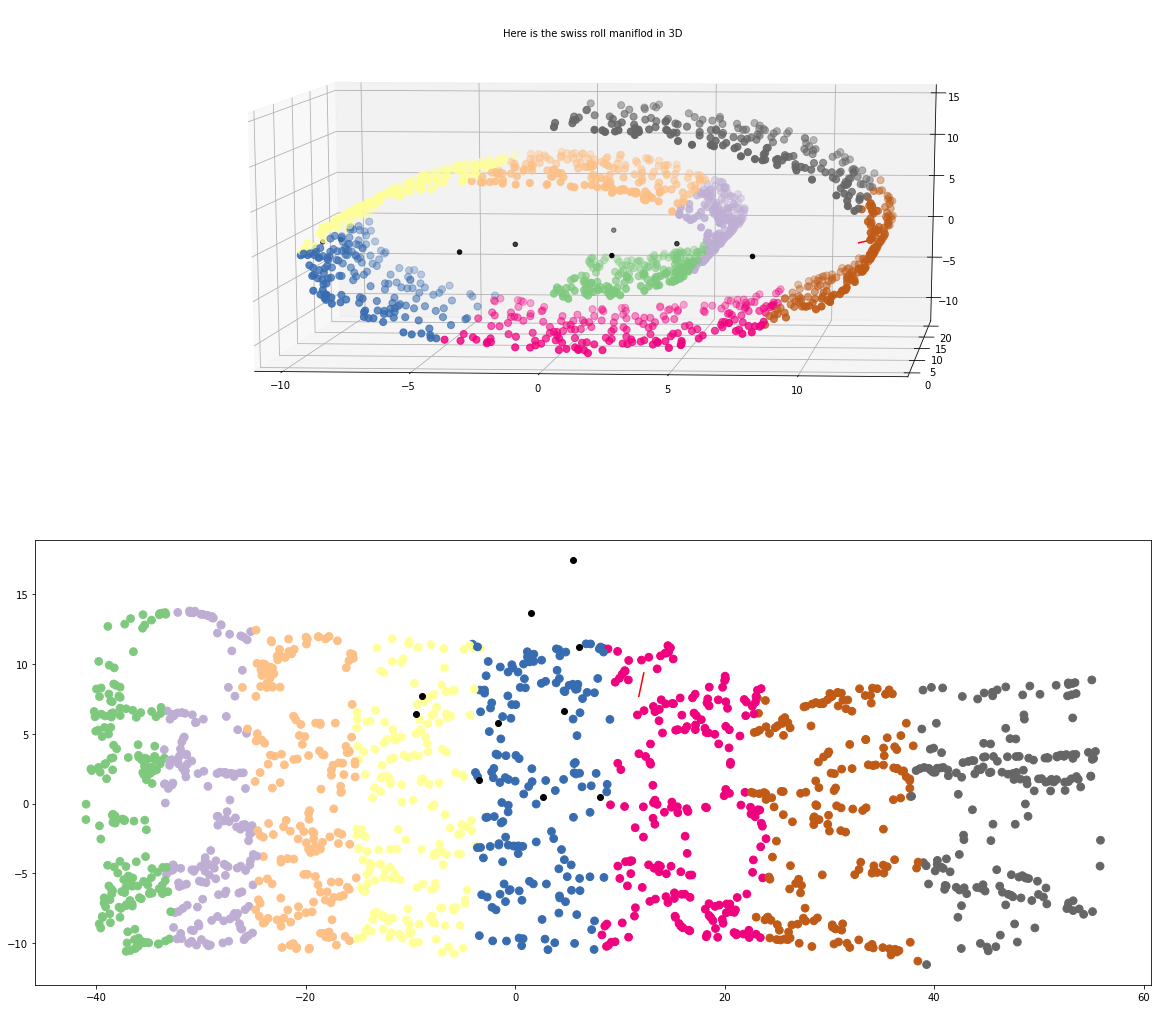

In [ ]:
# Calling the function to visualize the swissroll 
visualizeSwissRoll(iso_data, X, color)

Experiment with different values of **n_neighbors** to be passed to Isomap and observe the change in the structure of manifold 

If the 'K' value is very small the neighborhood graph is too sparse and therefore it cannot capture the geodesic distances

In [ ]:
# Fit and transform the data to Isomap with 'n_neighbor = 6' by getting distance along the manifold 

iso_data = Isomap(n_neighbors=6, n_components=2).fit_transform(X)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

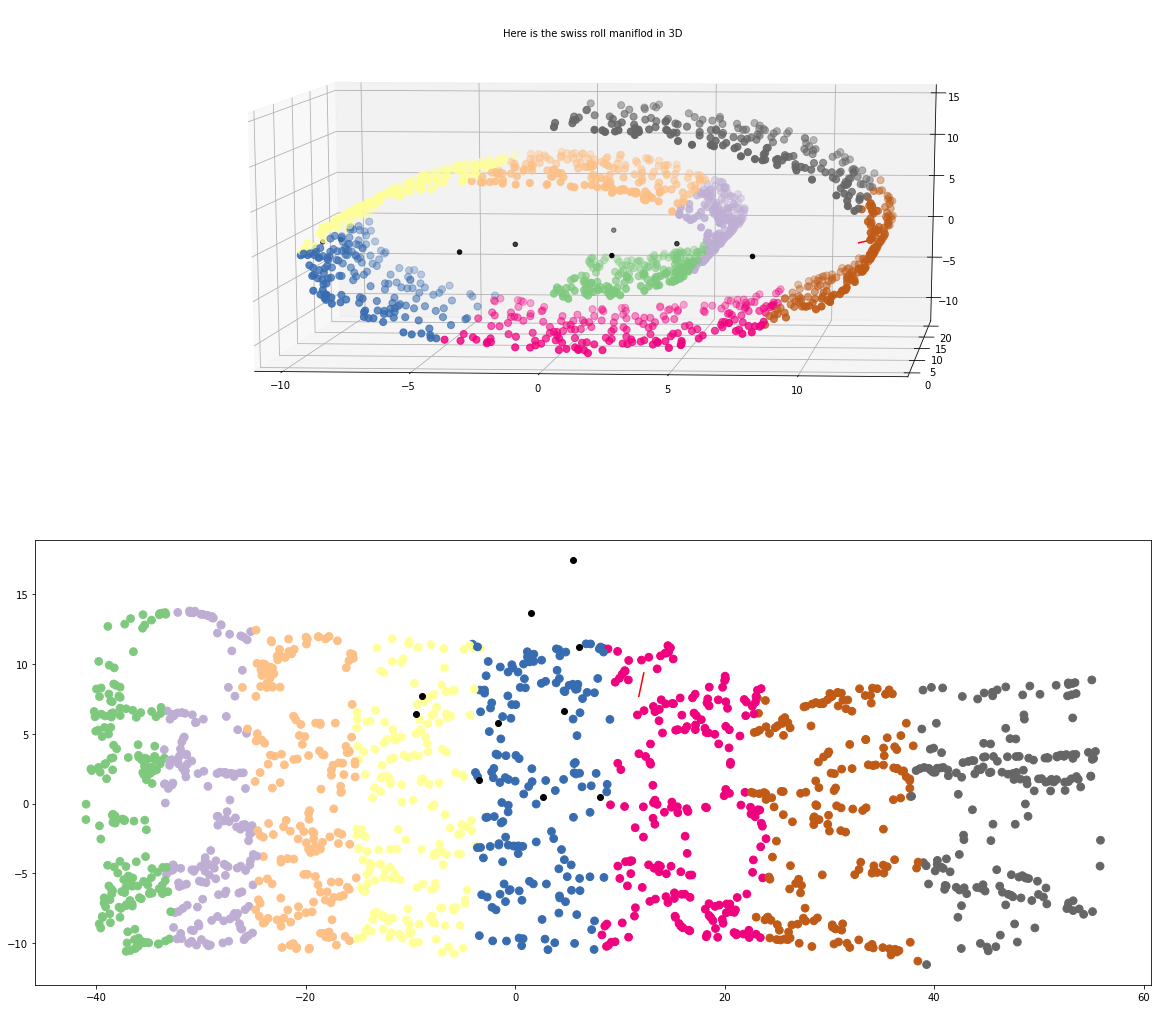

In [ ]:
# Calling the function to visualize the swissroll 
visualizeSwissRoll(iso_data, X, color)

Let us generate swiss roll data for 300 samples with some noise in it. 

**NOTE:** Noise here below has two components. i.e. number of samples  and variance (i.e. the 'noise' variable you see below). The idea here is, for example, you have only 10 samples, but they may contain a huge variance i.e. one noisy point can be in a 3D location at (2, 3, 2) and other noisy point can be in a 3D location at (40, 80, 100). As you can see the range of noise is high in the example just quoted. However, if the variance is low, the 3d point locations will be closer (and hence, as you might guess, the noise is less likely to disrupt the Manifold)


### Varying parameters of the range of noise i.e variance in the data, where noise = 0.01 * 200

In [ ]:
''' make_swiss_roll allows you to pass range of noisy samples along with n_samples 
where the range of noise affects the variance around data samples'''

# Generating the swiss roll data by adding noise
ndata, colors = make_swiss_roll(n_samples = 300, noise = 0.01 * 200 )

Let us concatenate the noise data values and original data values

In [ ]:
'''con_data has 300 additional samples that have been generated by make_swiss_roll with noise'''

import numpy as np
con_data =  np.concatenate((X, ndata), axis = 0) # X is orginal data and ndata is noise data
con_colors = np.concatenate((color,colors), axis = 0) # color is orginal and colors are noise

iso_con_data = Isomap(n_neighbors=10, n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

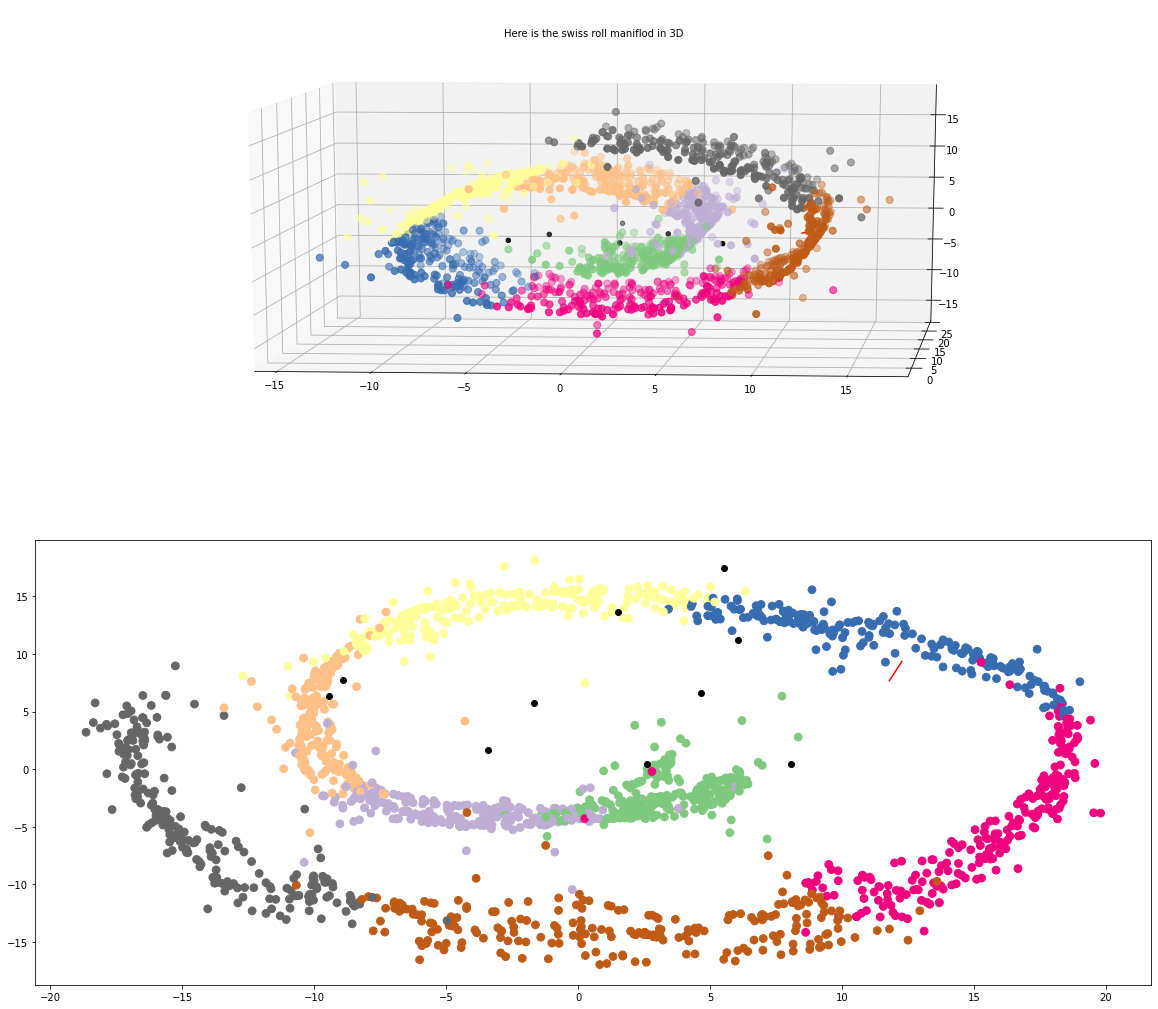

In [ ]:
# YOUR CODE HERE: To call the 'visualizeSwissRoll' function by passing the concatenated noisy data to visualize the swissroll
visualizeSwissRoll(iso_con_data,con_data,con_colors)

As the variance is high, the manifold structure is not clearly visible in the above graph. Try reducing the variance and observe the change in the structure of manifold

### Varying parameters of the range of noise i.e variance in the data, where noise = 0.01 * 50 


In [ ]:
# Tweak noise i.e the variance around data samples to visualize the representation

ndata, colors = make_swiss_roll(n_samples = 300, noise = 0.01 * 50 )

In [ ]:
# Let us concatenate the noise data values and original data values
con_data =  np.concatenate((X, ndata), axis = 0)
con_colors = np.concatenate((color, colors), axis = 0)

iso_con_data = Isomap(n_neighbors=10, n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

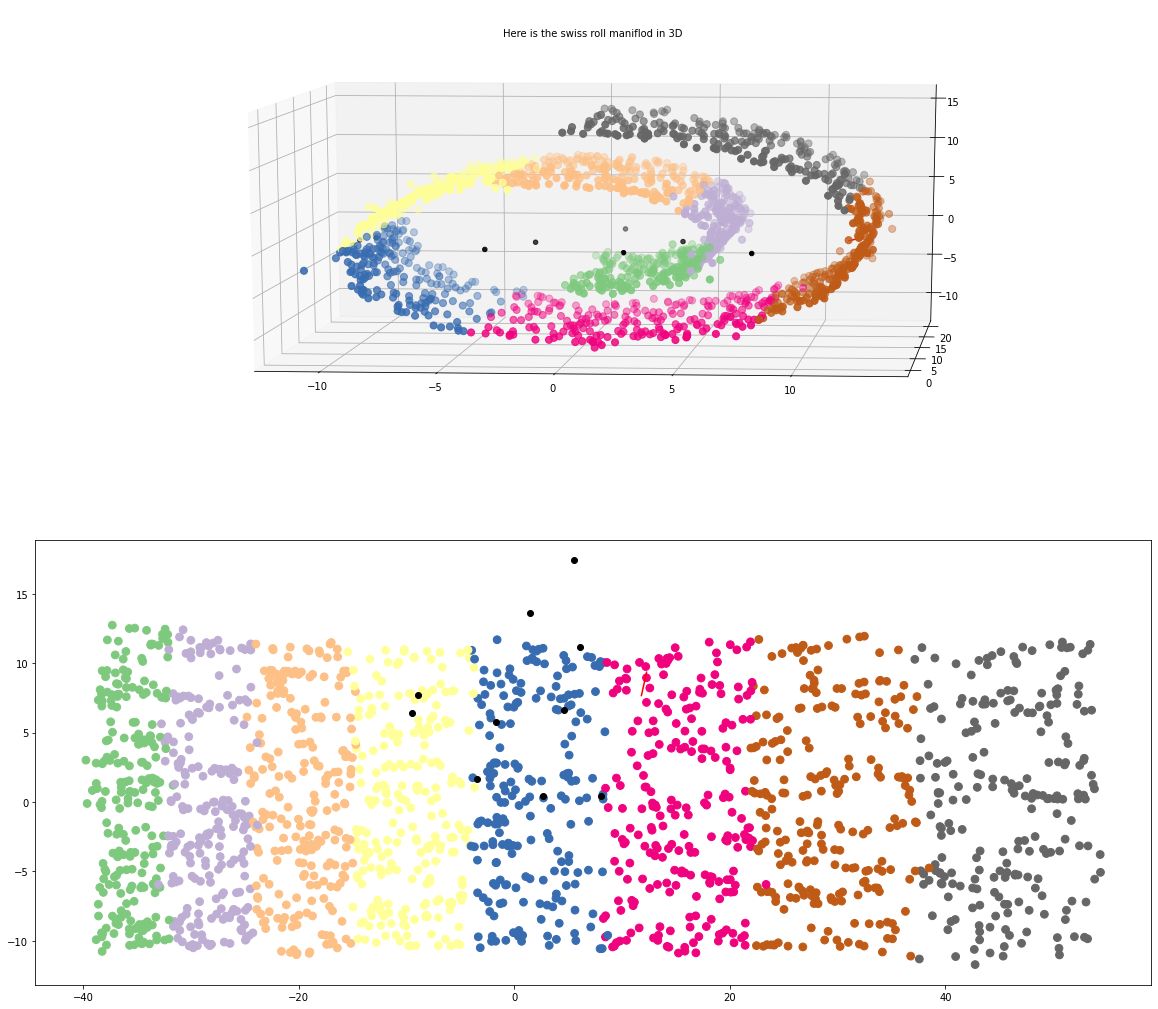

In [ ]:
# YOUR CODE HERE: To call the 'visualizeSwissRoll' function by passing the concatenated noisy data to visualize the swissroll
visualizeSwissRoll(iso_con_data,con_data,con_colors)

As you can see above, when the variance of noise is reduced, the 2D representation of Manifold looks fine. The rest of the experiment is with varying the values of noise and the number of samples, is merely for the sake of trying things out, and always noticing that ISOMAP is very sensitive to Noise, which other techniques such as TSNE will deal better with. You can see the same in TSNE experiment

### Varying parameters of the number of samples of data with noise and visualize the data

*   n_samples = 20,
*   noise = 0.01 * 200 

In [ ]:
# Tweak noise i.e the variance around data samples to visualize the representation

ndata, colors = make_swiss_roll(n_samples = 20, noise = 0.01 * 200 )

In [ ]:
# Let us concatenate the noise data values and original data values
con_data =  np.concatenate((X, ndata), axis = 0)
con_colors = np.concatenate((color, colors), axis = 0)

iso_data = Isomap(n_neighbors=10, n_components=2).fit_transform(con_data)

Let us visualize the Swiss roll data 

*   First plot, Visualize the data in 3D with noise
*   Second plot, Visualize after reducing it to 2D by applying ISOMAP

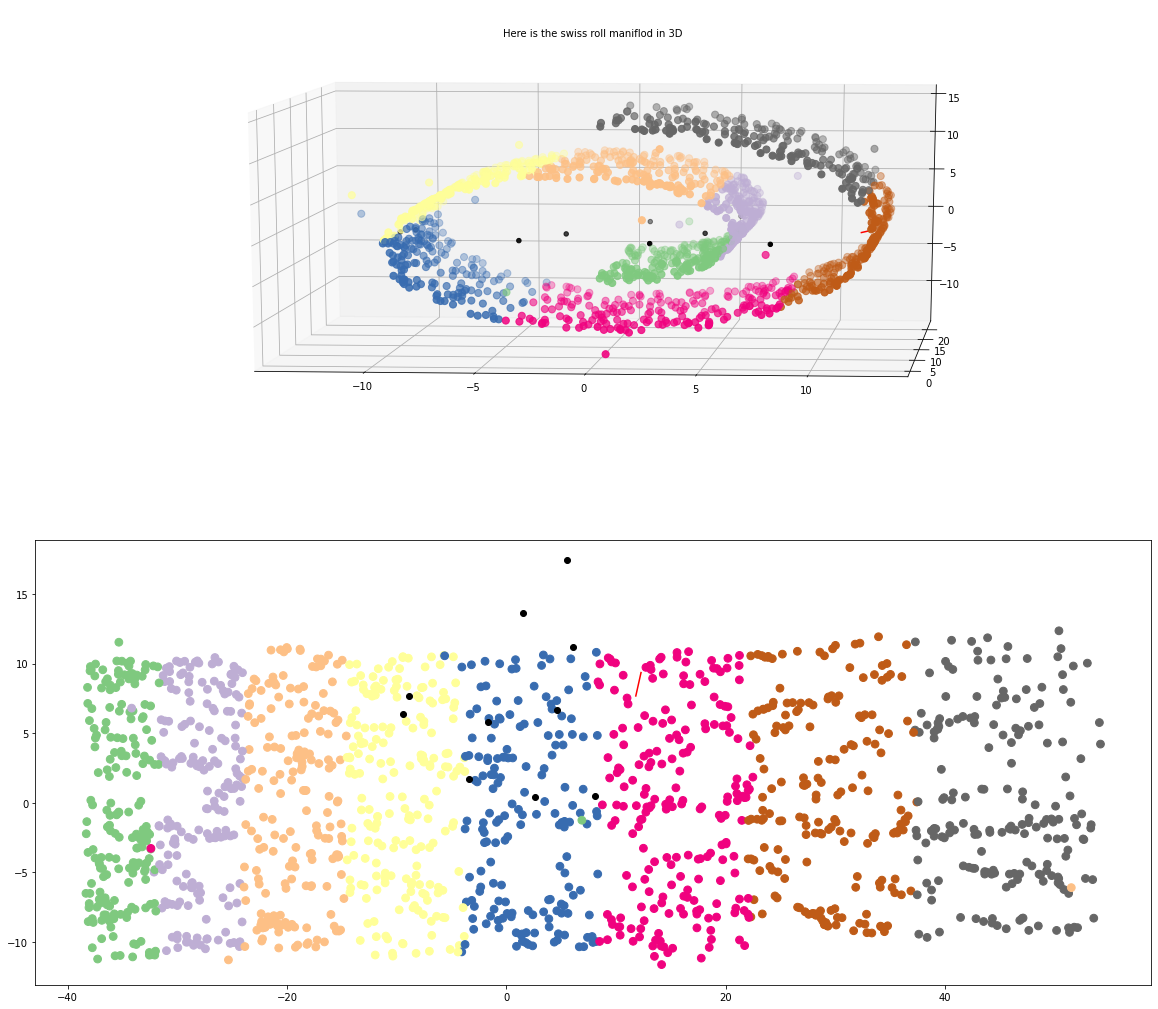

In [ ]:
# Call the function to visualize the swissroll
visualizeSwissRoll(iso_data, con_data, con_colors)

### Summary

ISOMAP has the basic idea of preserve geodesic distance as measured along the manifold, hence can flatten (unroll) the swiss roll. Notice that Isomap connects nearby points and hence preserves the geodesic distances. This makes it prone to "short-circuit errors" in which due to noise, the nearest neighbours change and the dimensionality reduction fails due to this extra connectivity. This is illustrated by it failing to unroll the swiss roll.

# Please answer the questions below to complete the experiment:




In [ ]:
#@title State True or False: ISOMAP is less senstive to noise when compared to TSNE?  { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True", "False"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "Everything is good" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")